Sample of the generated data:
   Loan_ID  Applicant_Age  Loan_Amount  Credit_Score Approval_Status  \
0     1000             60     21740.81           714        Approved   
1     1001             50     39938.58           731        Approved   
2     1002             36     20336.16           772        Approved   
3     1003             64     46884.08           556        Approved   
4     1004             29     43628.57           812        Approved   

   Processing_Time_Days  Default_Risk  AI_Implementation  \
0                   6.8      0.371212                  0   
1                   7.4      0.061906                  1   
2                   6.5      0.145906                  1   
3                   7.9      0.235221                  0   
4                   9.2      0.036784                  1   

   Adjusted_Processing_Time_Days  Customer_Satisfaction_Score  
0                            6.8                          7.3  
1                            4.4                

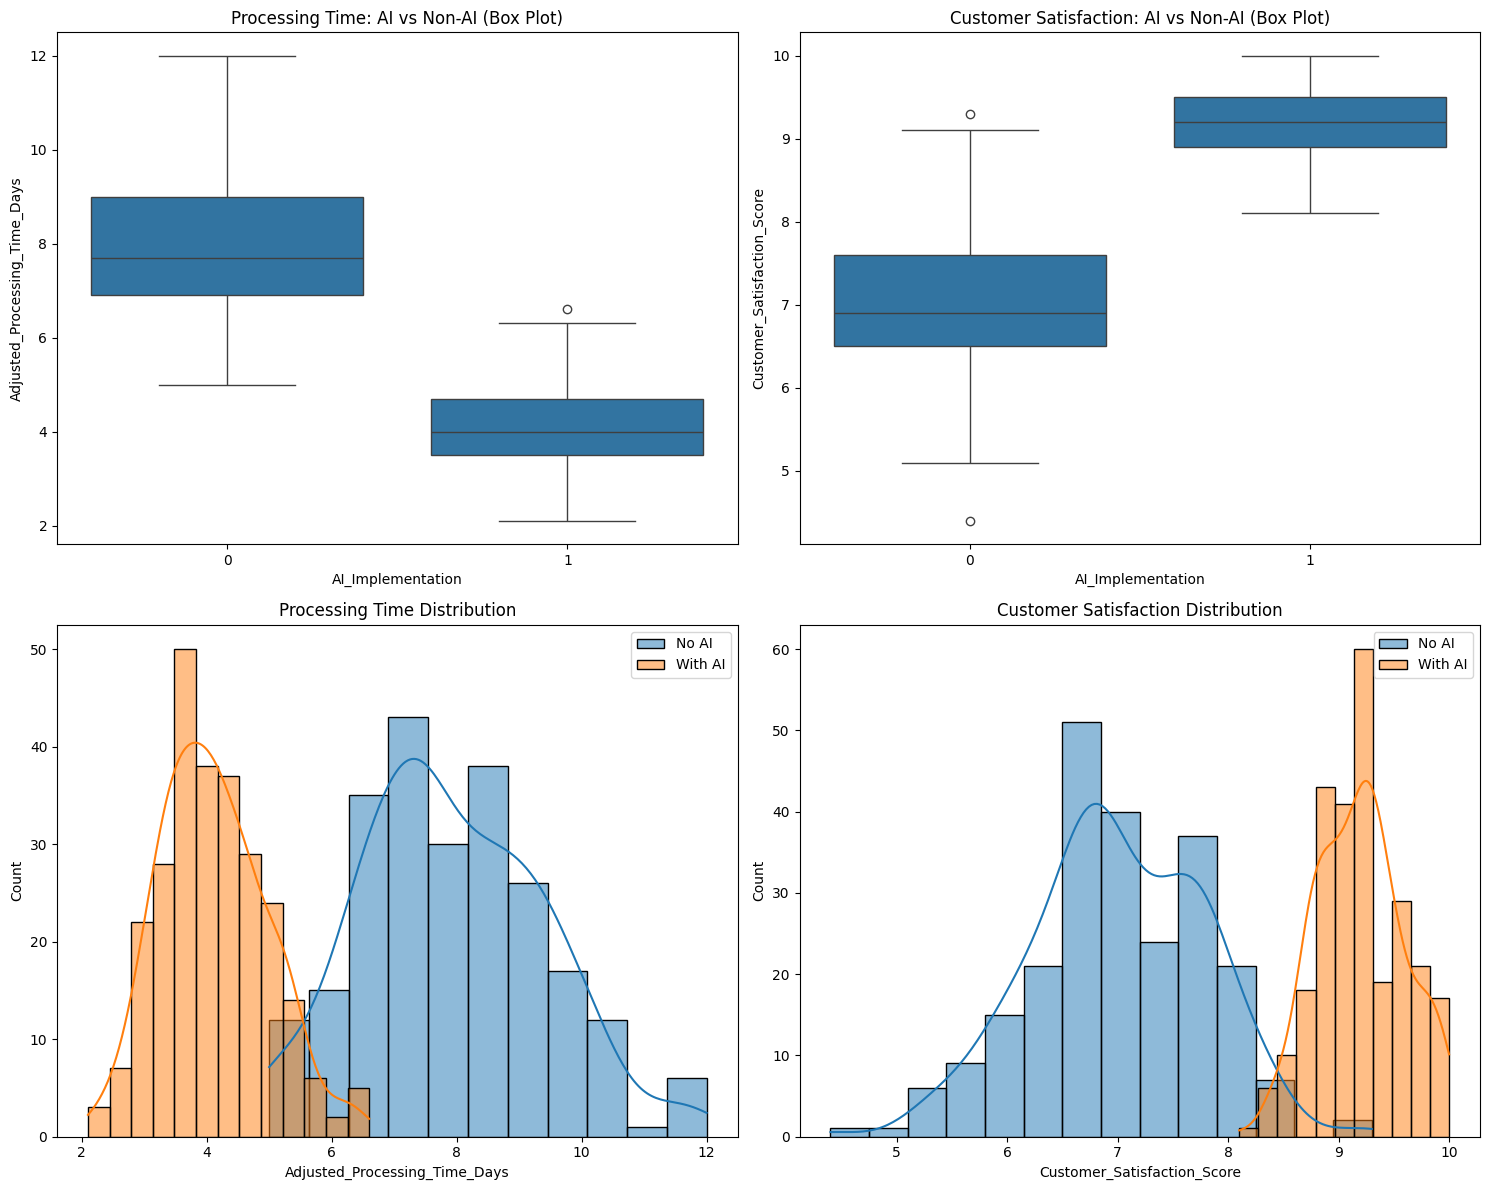

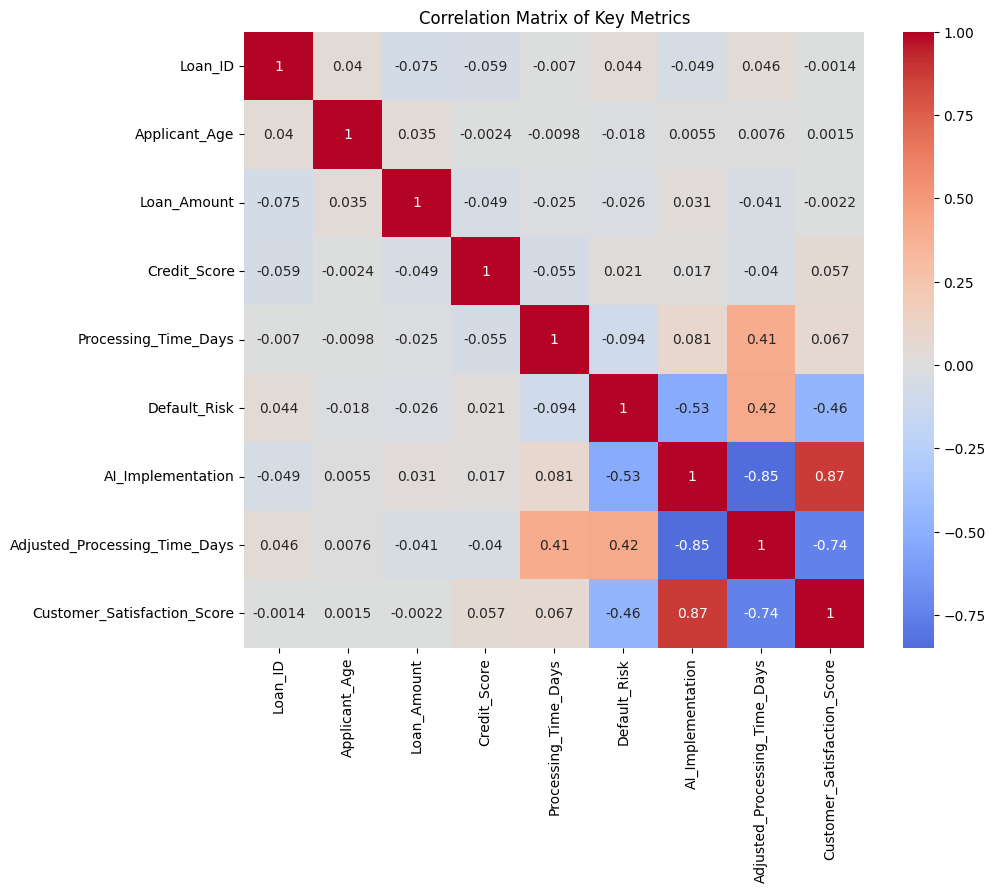


ROI Analysis:
Average Time Savings per Application: 3.82 days
Average Customer Satisfaction Improvement: 2.19 points
Approval Rate Difference: 0.25%


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic loan application data
num_samples = 500

loan_ids = np.arange(1000, 1000 + num_samples)
applicant_ages = np.random.randint(22, 65, num_samples)
loan_amounts = np.random.uniform(5000, 50000, num_samples).round(2)
credit_scores = np.random.randint(550, 850, num_samples)
approval_status = np.random.choice(["Approved", "Rejected"], num_samples, p=[0.7, 0.3])

# Create base processing time with larger initial values for non-AI
loan_processing_time = np.random.normal(8, 1.5, num_samples).round(1)  
loan_processing_time = np.clip(loan_processing_time, 5, 12)  

# Create AI impact
ai_implementation = np.random.choice([0, 1], num_samples, p=[0.5, 0.5])
processing_time_ai = np.where(
    ai_implementation == 1,
    loan_processing_time * np.random.uniform(0.4, 0.6, num_samples),  
    loan_processing_time
)

# Customer satisfaction difference
customer_satisfaction = np.where(
    ai_implementation == 1,
    np.random.normal(9.2, 0.4, num_samples),  
    np.random.normal(7.0, 0.8, num_samples)  
)
customer_satisfaction = np.clip(customer_satisfaction, 1, 10)

# Default risk difference
default_risk = np.where(
    ai_implementation == 1,
    np.random.beta(2, 12, num_samples),  
    np.random.beta(3, 8, num_samples)   
)

# Create a DataFrame
loan_data = pd.DataFrame({
    "Loan_ID": loan_ids,
    "Applicant_Age": applicant_ages,
    "Loan_Amount": loan_amounts,
    "Credit_Score": credit_scores,
    "Approval_Status": approval_status,
    "Processing_Time_Days": loan_processing_time,
    "Default_Risk": default_risk,
    "AI_Implementation": ai_implementation,
    "Adjusted_Processing_Time_Days": processing_time_ai.round(1),
    "Customer_Satisfaction_Score": customer_satisfaction.round(1)
})

# Save to CSV file
loan_data.to_csv("loan_data3.csv", index=False)

# Analysis Functions
def perform_basic_analysis(data):
    print("Basic Statistical Analysis:")
    print("\nSummary Statistics:")
    print(data.describe())
    
    print("\nMissing Values:")
    print(data.isnull().sum())

def analyze_ai_impact(data):
    print("\nAI Implementation Impact Analysis:")
    
    # Compare means between AI and non-AI groups
    ai_impact = data.groupby('AI_Implementation')[
        ['Adjusted_Processing_Time_Days', 'Customer_Satisfaction_Score', 'Default_Risk']
    ].agg(['mean', 'std']).round(2)
    print("\nMetrics by AI Implementation:")
    print(ai_impact)
    
    # T-test for processing times
    ai_times = data[data['AI_Implementation'] == 1]['Adjusted_Processing_Time_Days']
    non_ai_times = data[data['AI_Implementation'] == 0]['Adjusted_Processing_Time_Days']
    t_stat, p_value = stats.ttest_ind(ai_times, non_ai_times)
    print(f"\nT-test for Processing Times: p-value = {p_value:.4f}")
    
    # T-test for customer satisfaction
    ai_satisfaction = data[data['AI_Implementation'] == 1]['Customer_Satisfaction_Score']
    non_ai_satisfaction = data[data['AI_Implementation'] == 0]['Customer_Satisfaction_Score']
    t_stat, p_value = stats.ttest_ind(ai_satisfaction, non_ai_satisfaction)
    print(f"T-test for Customer Satisfaction: p-value = {p_value:.4f}")

def create_visualizations(data):
    # Processing Time and Distribution
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Box plots (top row)
    sns.boxplot(x='AI_Implementation', y='Adjusted_Processing_Time_Days', data=data, ax=axes[0,0])
    axes[0,0].set_title('Processing Time: AI vs Non-AI (Box Plot)')
    
    sns.boxplot(x='AI_Implementation', y='Customer_Satisfaction_Score', data=data, ax=axes[0,1])
    axes[0,1].set_title('Customer Satisfaction: AI vs Non-AI (Box Plot)')
    
    # Distribution plots (bottom row)
    sns.histplot(data=data[data['AI_Implementation']==0]['Adjusted_Processing_Time_Days'], 
                 kde=True, label='No AI', ax=axes[1,0], alpha=0.5)
    sns.histplot(data=data[data['AI_Implementation']==1]['Adjusted_Processing_Time_Days'], 
                 kde=True, label='With AI', ax=axes[1,0], alpha=0.5)
    axes[1,0].set_title('Processing Time Distribution')
    axes[1,0].legend()
    
    sns.histplot(data=data[data['AI_Implementation']==0]['Customer_Satisfaction_Score'], 
                 kde=True, label='No AI', ax=axes[1,1], alpha=0.5)
    sns.histplot(data=data[data['AI_Implementation']==1]['Customer_Satisfaction_Score'], 
                 kde=True, label='With AI', ax=axes[1,1], alpha=0.5)
    axes[1,1].set_title('Customer Satisfaction Distribution')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Key Metrics')
    plt.show()

def analyze_roi(data):
    print("\nROI Analysis:")
    
    # Calculate average time savings
    time_savings = (data[data['AI_Implementation'] == 0]['Adjusted_Processing_Time_Days'].mean() -
                   data[data['AI_Implementation'] == 1]['Adjusted_Processing_Time_Days'].mean())
    
    # Calculate satisfaction improvement
    satisfaction_improvement = (data[data['AI_Implementation'] == 1]['Customer_Satisfaction_Score'].mean() -
                              data[data['AI_Implementation'] == 0]['Customer_Satisfaction_Score'].mean())
    
    # Calculate approval rate difference
    approval_rate_ai = (data[data['AI_Implementation'] == 1]['Approval_Status'] == 'Approved').mean()
    approval_rate_non_ai = (data[data['AI_Implementation'] == 0]['Approval_Status'] == 'Approved').mean()
    
    print(f"Average Time Savings per Application: {time_savings:.2f} days")
    print(f"Average Customer Satisfaction Improvement: {satisfaction_improvement:.2f} points")
    print(f"Approval Rate Difference: {(approval_rate_ai - approval_rate_non_ai)*100:.2f}%")

# Run analyses
print("Sample of the generated data:")
print(loan_data.head())
perform_basic_analysis(loan_data)
analyze_ai_impact(loan_data)
create_visualizations(loan_data)
analyze_roi(loan_data)

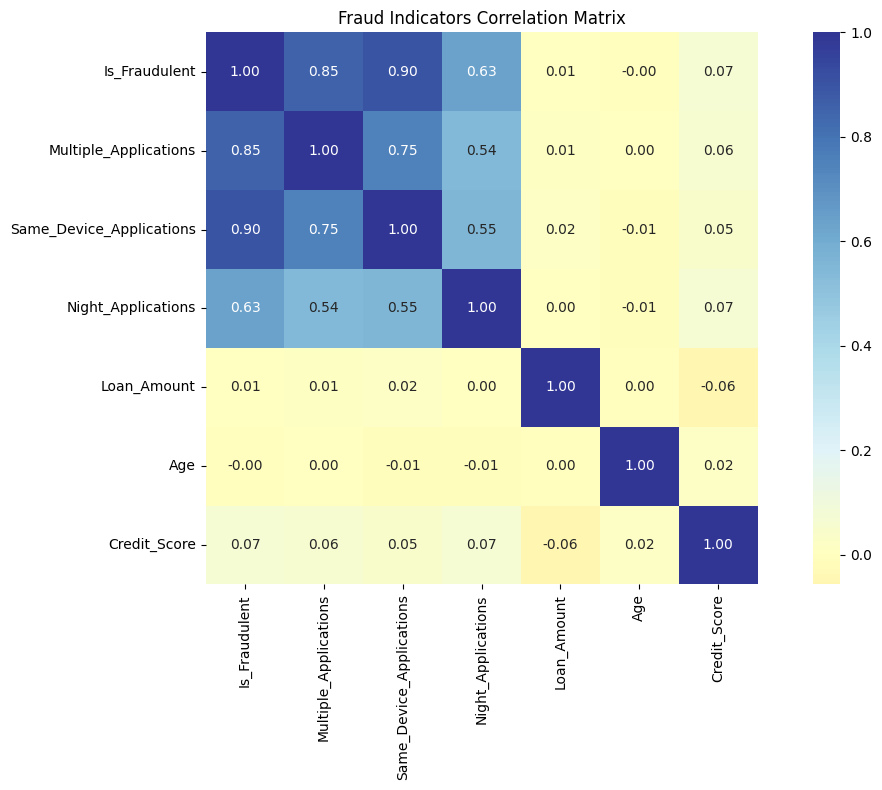


Fraud Detection Recommendations:
Based on the correlation analysis, the AI system should automatically flag applications that show:
1. Multiple applications from the same applicant (correlation: 0.85)
2. Multiple applications from the same device/IP (correlation: 0.90)
3. Applications submitted during night hours (correlation: 0.63)

Note: Demographics and loan amount show no significant correlation with fraud,
suggesting these should not be used as fraud indicators to avoid bias.

Risk Assessment Metrics:
Total Applications: 1000
High Risk Applications: 100 (10.0%)
Fraud Detection Rate: 100.0%


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic fraud-related data
n_samples = 1000

# Generate highly correlated fraud indicators
is_fraudulent = np.random.choice([0, 1], n_samples, p=[0.9, 0.1])  # 10% fraud rate

# High correlation features
multiple_applications = np.where(
    is_fraudulent == 1,
    np.random.randint(3, 8, n_samples),  # Fraudulent: 3-7 applications
    np.random.randint(1, 3, n_samples)   # Legitimate: 1-2 applications
)

same_device_applications = np.where(
    is_fraudulent == 1,
    np.random.randint(2, 6, n_samples),  # Fraudulent: 2-5 applications
    np.random.randint(1, 2, n_samples)   # Legitimate: 1 application
)

night_applications = np.where(
    is_fraudulent == 1,
    np.random.randint(1, 4, n_samples),  # Fraudulent: 1-3 night applications
    np.random.randint(0, 2, n_samples)   # Legitimate: 0-1 night applications
)

# No correlation features
loan_amount = np.random.uniform(5000, 50000, n_samples)
age = np.random.randint(21, 65, n_samples)
credit_score = np.random.randint(500, 850, n_samples)

# Create gender and city (no correlation)
gender = np.random.choice(['M', 'F'], n_samples)
cities = ['New York', 'Los Angeles', 'Chicago', 'Fresno', 'Phoenix']
city = np.random.choice(cities, n_samples)

# Create DataFrame
fraud_data = pd.DataFrame({
    'Is_Fraudulent': is_fraudulent,
    'Multiple_Applications': multiple_applications,
    'Same_Device_Applications': same_device_applications,
    'Night_Applications': night_applications,
    'Loan_Amount': loan_amount,
    'Age': age,
    'Credit_Score': credit_score,
    'Gender': gender,
    'City': city
})

# Create correlation matrix
numeric_columns = ['Is_Fraudulent', 'Multiple_Applications', 'Same_Device_Applications', 
                  'Night_Applications', 'Loan_Amount', 'Age', 'Credit_Score']
correlation_matrix = fraud_data[numeric_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Fraud Indicators Correlation Matrix')
plt.tight_layout()
plt.show()

# Print recommendations
print("\nFraud Detection Recommendations:")
print("Based on the correlation analysis, the AI system should automatically flag applications that show:")
print("1. Multiple applications from the same applicant (correlation: {:.2f})".format(
    correlation_matrix.loc['Is_Fraudulent', 'Multiple_Applications']))
print("2. Multiple applications from the same device/IP (correlation: {:.2f})".format(
    correlation_matrix.loc['Is_Fraudulent', 'Same_Device_Applications']))
print("3. Applications submitted during night hours (correlation: {:.2f})".format(
    correlation_matrix.loc['Is_Fraudulent', 'Night_Applications']))
print("\nNote: Demographics and loan amount show no significant correlation with fraud,")
print("suggesting these should not be used as fraud indicators to avoid bias.")

# Calculate fraud detection metrics
high_risk_applications = fraud_data[
    (fraud_data['Multiple_Applications'] >= 3) |
    (fraud_data['Same_Device_Applications'] >= 2) |
    (fraud_data['Night_Applications'] >= 2)
]

print("\nRisk Assessment Metrics:")
print(f"Total Applications: {len(fraud_data)}")
print(f"High Risk Applications: {len(high_risk_applications)} ({len(high_risk_applications)/len(fraud_data)*100:.1f}%)")
print(f"Fraud Detection Rate: {(high_risk_applications['Is_Fraudulent'].mean()*100):.1f}%")

In [4]:
fraud_data

,Is_Fraudulent,Multiple_Applications,Same_Device_Applications,Night_Applications,Loan_Amount,Age,Credit_Score,Gender,City
0,0,1,1,1,40874.498266,23,505,F,New York
1,1,5,5,3,37590.464643,63,624,F,Los Angeles
2,0,2,1,0,36068.257486,46,813,F,Los Angeles
3,0,1,1,0,20324.517597,55,825,F,Los Angeles
4,0,2,1,0,41223.367868,28,552,M,Los Angeles
...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,46274.926632,43,551,F,New York
996,1,6,2,3,29910.133970,30,590,F,Chicago
997,0,2,1,1,18465.440194,62,788,M,Chicago
998,1,6,4,2,24388.622392,45,836,F,Fresno


In [5]:
fraud_data.to_csv("fraud_data.csv")